In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [2]:
df = pd.read_csv("./data_out.csv")
df.head()

,station,year,month,day,lon,lat,elevation,tmpf,dwpf,relh,...,mslp,p01m,vsby,skyc1,skyc2,skyc3,skyl1,skyl2,skyl3,p01m_tmrw
0,0,2022,3,1,-103.995,41.5117,1602.91,48.316667,22.262500,36.060833,...,1018.375000,0,10.000000,0,0,0,5500.000000,5791.666667,6000.000000,0
1,0,2022,3,2,-103.995,41.5117,1602.91,50.082609,27.417391,43.750000,...,1018.413043,0,10.000000,0,0,0,10478.260870,6391.304348,6000.000000,0
2,0,2022,3,3,-103.995,41.5117,1602.91,51.925000,22.116667,33.442500,...,1015.212500,0,10.000000,0,0,0,6666.666667,5791.666667,6000.000000,0
3,0,2022,3,4,-103.995,41.5117,1602.91,45.725000,23.545833,48.088333,...,1007.333333,0,9.916667,0,0,0,13583.333330,5812.500000,6000.000000,0
4,0,2022,3,5,-103.995,41.5117,1602.91,25.508333,21.150000,84.572500,...,1009.058333,0,3.860000,0,0,0,2275.000000,3920.833333,5204.166667,0


In [3]:
len(df)

3901

In [4]:
X = df.drop(['p01m_tmrw'], axis=1)

y = df['p01m_tmrw']

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [6]:
X_train.shape, X_test.shape

((3120, 21), (781, 21))

In [7]:
categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

[]

In [9]:
numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['station',
 'year',
 'month',
 'day',
 'lon',
 'lat',
 'elevation',
 'tmpf',
 'dwpf',
 'relh',
 'feel',
 'alti',
 'mslp',
 'p01m',
 'vsby',
 'skyc1',
 'skyc2',
 'skyc3',
 'skyl1',
 'skyl2',
 'skyl3']

In [14]:
# check missing values in X_test

X.isnull().sum()

station      0
year         0
month        0
day          0
lon          0
lat          0
elevation    0
tmpf         0
dwpf         0
relh         0
feel         0
alti         0
mslp         0
p01m         0
vsby         0
skyc1        0
skyc2        0
skyc3        0
skyl1        0
skyl2        0
skyl3        0
dtype: int64

<h2>Feature Scaling</h2>

In [15]:
cols = X_train.columns

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

<h2>Model Training</h2>

In [18]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(random_state=0, solver='liblinear')

In [19]:
# prediction
y_pred_test = logreg.predict(X_test)

y_pred_test

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [20]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.90038145, 0.73609549, 0.90065106, 0.93517139, 0.886004  ,
       0.87436592, 0.86683611, 0.66809792, 0.93543161, 0.69538531,
       0.81128584, 0.89093547, 0.92382055, 0.74968018, 0.93218305,
       0.90513208, 0.8402427 , 0.69615617, 0.709446  , 0.91087784,
       0.8308498 , 0.89241095, 0.81733025, 0.87891274, 0.88812184,
       0.84086378, 0.89000642, 0.87591729, 0.79057795, 0.76451036,
       0.90179831, 0.89944206, 0.76259201, 0.72854844, 0.91994868,
       0.8139919 , 0.94453398, 0.78808738, 0.90127218, 0.89668312,
       0.79196385, 0.91579027, 0.910207  , 0.72930125, 0.90873669,
       0.69815394, 0.8765901 , 0.87426693, 0.93200859, 0.91998273,
       0.90074479, 0.93158175, 0.9547617 , 0.65272213, 0.88900653,
       0.9223265 , 0.84768165, 0.61244509, 0.84926047, 0.75613817,
       0.674761  , 0.77441249, 0.69883227, 0.71662511, 0.79242999,
       0.9211433 , 0.68027768, 0.90264973, 0.77282891, 0.73853764,
       0.78089877, 0.82868482, 0.8959206 , 0.66772362, 0.78103

In [21]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.09961855, 0.26390451, 0.09934894, 0.06482861, 0.113996  ,
       0.12563408, 0.13316389, 0.33190208, 0.06456839, 0.30461469,
       0.18871416, 0.10906453, 0.07617945, 0.25031982, 0.06781695,
       0.09486792, 0.1597573 , 0.30384383, 0.290554  , 0.08912216,
       0.1691502 , 0.10758905, 0.18266975, 0.12108726, 0.11187816,
       0.15913622, 0.10999358, 0.12408271, 0.20942205, 0.23548964,
       0.09820169, 0.10055794, 0.23740799, 0.27145156, 0.08005132,
       0.1860081 , 0.05546602, 0.21191262, 0.09872782, 0.10331688,
       0.20803615, 0.08420973, 0.089793  , 0.27069875, 0.09126331,
       0.30184606, 0.1234099 , 0.12573307, 0.06799141, 0.08001727,
       0.09925521, 0.06841825, 0.0452383 , 0.34727787, 0.11099347,
       0.0776735 , 0.15231835, 0.38755491, 0.15073953, 0.24386183,
       0.325239  , 0.22558751, 0.30116773, 0.28337489, 0.20757001,
       0.0788567 , 0.31972232, 0.09735027, 0.22717109, 0.26146236,
       0.21910123, 0.17131518, 0.1040794 , 0.33227638, 0.21896

<h2>Accuracy</h2>

In [22]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.8246


In [23]:
y_pred_train = logreg.predict(X_train)

y_pred_train

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8381


In [25]:
# check for overfitting/underfitting

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.8381
Test set score: 0.8246


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [26]:
# fit the Logsitic Regression model with C=100 for potential underfitting

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(C=100, random_state=0, solver='liblinear')

In [27]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.8375
Test set score: 0.8220


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [28]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [29]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.8388
Test set score: 0.8323


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


In [30]:
# null accuracy
# check class distribution in test set

y_test.value_counts()

0    650
1    131
Name: p01m_tmrw, dtype: int64

In [31]:
# check null accuracy score

null_accuracy = (15995/(15995+2578))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.8612


<h2>Confusion Matrix</h2>

In [32]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[644   6]
 [131   0]]

True Positives(TP) =  644

True Negatives(TN) =  0

False Positives(FP) =  6

False Negatives(FN) =  131


<AxesSubplot:>

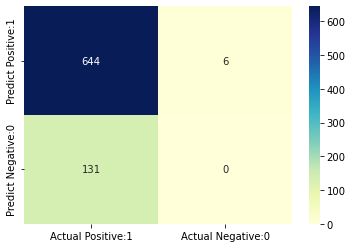

In [33]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<h2>Classification Matrix</h2>

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.83      0.99      0.90       650
           1       0.00      0.00      0.00       131

    accuracy                           0.82       781
   macro avg       0.42      0.50      0.45       781
weighted avg       0.69      0.82      0.75       781



In [35]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [36]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.8246


In [37]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.1754


In [38]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9908


In [39]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8310


In [40]:
true_positive_rate = TP / float(TP + FN)


print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

True Positive Rate : 0.8310


In [41]:
false_positive_rate = FP / float(FP + TN)


print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

False Positive Rate : 1.0000


In [42]:
specificity = TN / (TN + FP)

print('Specificity : {0:0.4f}'.format(specificity))

Specificity : 0.0000


<h2>Adjusting Threshold Level</h2>

In [43]:
# print the first 10 predicted probabilities of two classes- 0 and 1

y_pred_prob = logreg.predict_proba(X_test)[0:10]

y_pred_prob

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([[0.90038145, 0.09961855],
       [0.73609549, 0.26390451],
       [0.90065106, 0.09934894],
       [0.93517139, 0.06482861],
       [0.886004  , 0.113996  ],
       [0.87436592, 0.12563408],
       [0.86683611, 0.13316389],
       [0.66809792, 0.33190208],
       [0.93543161, 0.06456839],
       [0.69538531, 0.30461469]])

In [44]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])

y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.900381,0.099619
1,0.736095,0.263905
2,0.900651,0.099349
3,0.935171,0.064829
4,0.886004,0.113996
5,0.874366,0.125634
6,0.866836,0.133164
7,0.668098,0.331902
8,0.935432,0.064568
9,0.695385,0.304615


In [45]:
# print the first 10 predicted probabilities for class 1 - Probability of rain

logreg.predict_proba(X_test)[0:10, 1]

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([0.09961855, 0.26390451, 0.09934894, 0.06482861, 0.113996  ,
       0.12563408, 0.13316389, 0.33190208, 0.06456839, 0.30461469])

In [46]:
# store the predicted probabilities for class 1 - Probability of rain

y_pred1 = logreg.predict_proba(X_test)[:, 1]

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


Text(0, 0.5, 'Frequency')

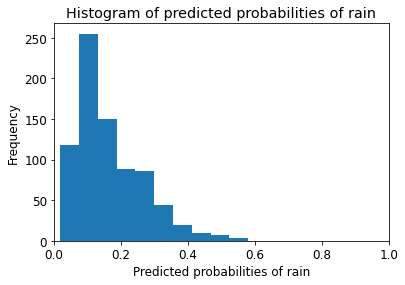

In [47]:
# plot histogram of predicted probabilities


# adjust the font size 
plt.rcParams['font.size'] = 12


# plot histogram with 10 bins
plt.hist(y_pred1, bins = 10)


# set the title of predicted probabilities
plt.title('Histogram of predicted probabilities of rain')

# set the x-axis limit
plt.xlim(0,1)


# set the title
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')

<h2>ROC AUC</h2>

In [50]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7315


In [51]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.7030


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\U

<h2>k fold cross validation<h2>

In [52]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.83974359 0.83814103 0.83653846 0.83814103 0.8349359 ]


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\U

In [53]:
# compute Average cross-validation score

print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8375


<h2>Hyperparameter Optimization<h2>

In [54]:
from sklearn.model_selection import GridSearchCV


parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]



grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)


grid_search.fit(X_train, y_train)

C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\U

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [55]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8375


Parameters that give the best results : 

 {'penalty': 'l2'}


Estimator that was chosen by the search : 

 LogisticRegression(random_state=0, solver='liblinear')


In [56]:
# calculate GridSearch CV score on test set

print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8246


C:\Users\vvnng\anaconda3\envs\myenv\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
